# R in Jupyter

This is a [Jupyter notebook](http://jupyter.org/index.html) that is running the [IRkernel](https://irkernel.github.io/), so that it offers a full R environment (much the same as the Console in RStudio).
As this is Jupyter, then the cells when switched to "Markdown" (like this one) support the [full Jupyter Markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

So that also means that LaTeX is supported. For example, even something "fancy" like the [HistFactory](https://cds.cern.ch/record/1456844/) p.d.f. template can be rendered easily! $\checkmark$

$$
\mathcal{P}\left(n_{c}, x_{e}, a_{p} \middle|\phi_{p}, \alpha_{p}, \gamma_{b} \right) = \prod_{c \,\in\, \textrm{channels}} \left[\textrm{Pois}\left(n_{c} \middle| \nu_{c}\right) \prod_{e=1}^{n_{c}} f_{c}\left(x_{e} \middle| \vec{\alpha}\right)\right] G\left(L_{0} \middle| \lambda, \Delta_{L}\right) \prod_{p\, \in\, \mathbb{S}+\Gamma} f_{p}\left(a_{p} \middle| \alpha_{p}\right)
$$

However, the point here is obviously to write some R in a reproducible way. If you're familiar with R Markdown, then the use case here is immediatley obvious: a full description in text of the thoughts, motivations, and details while having the code and results appear in the flow of the text.

## First time in Jupyter

If you've never used a Jupyter notebook before then you might want to consider either reading through one of the [brief use tutorials on the Jupyter wiki](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#entire-books-or-other-large-collections-of-notebooks-on-a-topic) and glancing at the [DataCamp "Jupyter Notebook Cheat Sheet"](https://www.datacamp.com/community/blog/jupyter-notebook-cheat-sheet).

**TLDR**

- Click to type in cells.
- Select cell type (e.g., Code, Markdown) from top toolbar
- Run cells with either the "Run" button in the top toolbar or with `Ctrl`+`Enter`
- Run the whole notebook in a clean environment by going to the **Kernel** menu then selecting **Restart & Run All**

## Simple examples

Let's load a non base R package to show that we can

In [1]:
library(ggplot2)

And now we'll reproduce [some example code](https://www.statmethods.net/advgraphs/ggplot2.html) using the [`mtcars` dataset](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) from R

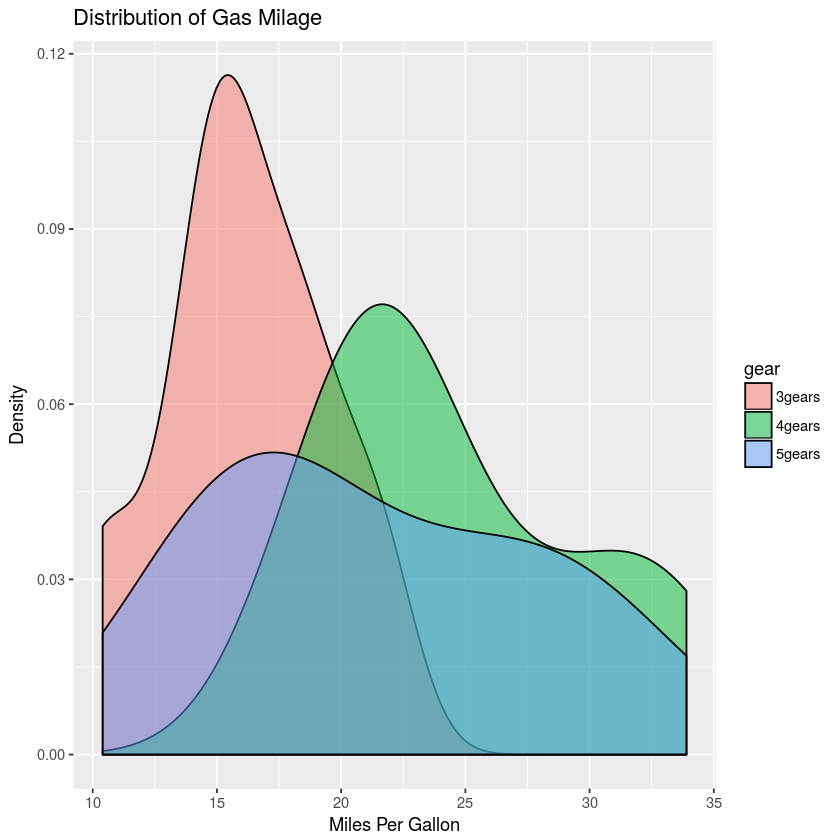

In [2]:
# https://www.statmethods.net/advgraphs/ggplot2.html

# create factors with value labels 
mtcars$gear <- factor(mtcars$gear,levels=c(3,4,5),
  	labels=c("3gears","4gears","5gears")) 
mtcars$am <- factor(mtcars$am,levels=c(0,1),
  	labels=c("Automatic","Manual")) 
mtcars$cyl <- factor(mtcars$cyl,levels=c(4,6,8),
   labels=c("4cyl","6cyl","8cyl"))

# Kernel density plots for mpg
# grouped by number of gears (indicated by color)
qplot(mpg, data=mtcars, geom="density", fill=gear, alpha=I(.5), 
   main="Distribution of Gas Milage", xlab="Miles Per Gallon", 
   ylab="Density")

As another example, consider some code taken from Alexander Etz's blog post _[Understanding Bayes: A Look at the Likelihood](https://alexanderetz.com/2015/04/15/understanding-bayes-a-look-at-the-likelihood/)_.

In [3]:
LR <- function(h, n, p1=0.5, p2=0.75) {
    L1 <- dbinom(h,n,p1)/dbinom(h,n,h/n) ## Likelihood for p1, standardized vs the MLE
    L2 <- dbinom(h,n,p2)/dbinom(h,n,h/n) ## Likelihood for p2, standardized vs the MLE
    Ratio <- dbinom(h,n,p1)/dbinom(h,n,p2) ## Likelihood ratio for p1 vs p2
    curve(dbinom(h,n,x)/max(dbinom(h,n,x)),
          xlim = c(0,1), 
          xlab = "Probability of heads",
          ylab = "Likelihood",
          las=1,
          main = "Likelihood function for coin flips",
          lwd = 3)
    points(p1, L1, cex = 2, pch = 21, bg = "cyan")
    points(p2, L2, cex = 2, pch = 21, bg = "cyan")
    lines(c(p1, p2), c(L1, L1), lwd = 3, lty = 2, col = "cyan")
    lines(c(p2, p2), c(L1, L2), lwd = 3, lty = 2, col = "cyan")
    abline(v = h/n, lty = 5, lwd = 1, col = "grey73")
    return(Ratio) ## Returns the likelihood ratio for p1 vs p2
}

And now we execute the function.

> By default the cell below will try to keep a size that is viewable on a single screeen. To have the plot be shown in a full vertical mode, hover over the left margin of the cell and click to "unscroll output".

[1] 4.213992

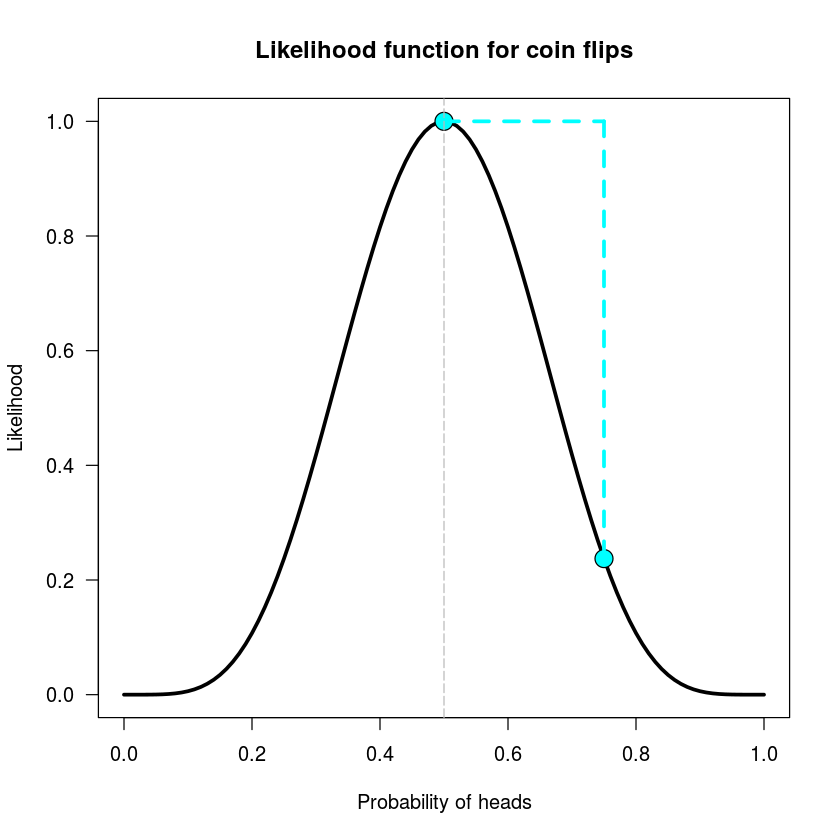

In [4]:
LR(5,10)

## Adding Reproducibility Features

At this point some extra things that are not core parts of Jupyter are going to be introduced to show a toy example of how a Jupyter notebook can be used to automate reproducibility checks while still keeping a nice layout. So none of this is "required" knowledge to use Jupyter in any way, but it is cool!

Start by loading the R bindings for [`papermill`](https://github.com/nteract/papermill)

In [5]:
library(papermillR)

Let's create a parameters cell for `papermill`. These parameters are going to be hooks that allow papermill to interact with the Jupyter notebook externally.

If you don't see the "Add tag" button in the upper right hand side of the cell below go to the **View** menu then **Cell Toolbar** and turn on **Tags**. There is already a "paramters" tag, but if it didn't exist you would add this by typing "parameters" into the box near "Add tag" and hitting enter.

In [6]:
# This cell is tagged `parameters` and contains variables that papermill can control
heads = 1
tosses = 5

Seeing the tags box is a bit ugly though, so feel free to toggle it back off after you've seen how that works.

We now have the variables `heads` and `tosses` which `papermill` can control, and we'll also now have `papermill` record the output of a command using those variables so we can access the information from outside the environment.

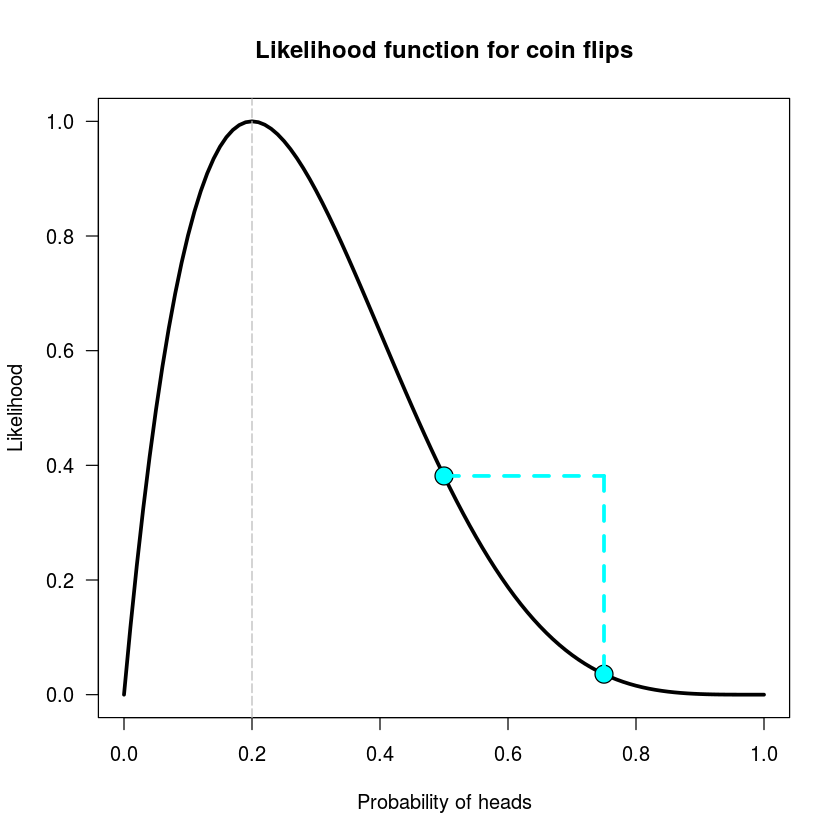

In [7]:
trial_results = LR(heads,tosses)
papermillR::pm_record("coin_trials", trial_results)

At this point it is worth looking at the section in the `README` about testing with `pytest` and continuous integration (CI) with Travis CI for some explenation through example. In short, we have added a way for automated variational testing of code/models/experiments in a reproducible and human readable environment.